### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
# Check for Missing Values
missing_data = data.isnull().sum()
print(missing_data)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [5]:
# Check for Data Types
data_types = data.dtypes
print(data_types)

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


In [6]:
# Check for Duplicates
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

     destination passanger weather  temperature  time                 coupon  \
4192        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4236        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4280        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4324        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4409        Work     Alone   Sunny           80   7AM  Carry out & Take away   
...          ...       ...     ...          ...   ...                    ...   
8511        Home     Alone   Sunny           80   6PM                    Bar   
8512        Home   Partner   Sunny           30  10PM  Carry out & Take away   
8513        Work     Alone   Rainy           55   7AM        Restaurant(<20)   
8515        Work     Alone   Snowy           30   7AM      Restaurant(20-50)   
8516        Work     Alone   Sunny           80   7AM        Restaurant(<20)   

     expiration  gender age    maritalS

In [7]:
# Statistical Summary
summary = data.describe()
print(summary)

        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000     

In [8]:
# Display a random sample of 10 rows
sample_data = data.sample(10)
print(sample_data)

           destination  passanger weather  temperature  time  \
2275   No Urgent Place  Friend(s)   Sunny           80   2PM   
4800              Home      Alone   Sunny           80  10PM   
4907              Home      Alone   Sunny           80   6PM   
5112              Home      Alone   Sunny           80   6PM   
1790   No Urgent Place  Friend(s)   Sunny           80   2PM   
11639  No Urgent Place  Friend(s)   Snowy           30   2PM   
3930              Work      Alone   Sunny           55   7AM   
5427              Home      Alone   Sunny           80  10PM   
6120   No Urgent Place    Partner   Sunny           80  10AM   
6010              Home      Alone   Sunny           55   6PM   

                  coupon expiration  gender age      maritalStatus  ...  \
2275        Coffee House         1d  Female  41             Single  ...   
4800                 Bar         1d    Male  21             Single  ...   
4907        Coffee House         1d  Female  31    Married partner  ..

3. Decide what to do about your missing data -- drop, replace, other...

In [9]:
data = data.dropna()

4. What proportion of the total observations chose to accept the coupon? 



In [10]:
# Count the number of observations where 'Y' is equal to 1 (accepted the coupon)
accepted_count = data['Y'].sum()

# Calculate the total number of observations in the dataset
total_observations = len(data)

# Calculate the proportion of accepted coupons
proportion_accepted = accepted_count / total_observations

print(f"Proportion of total observations that accepted the coupon: {proportion_accepted:.2%}")


Proportion of total observations that accepted the coupon: 57.41%


5. Use a bar plot to visualize the `coupon` column.

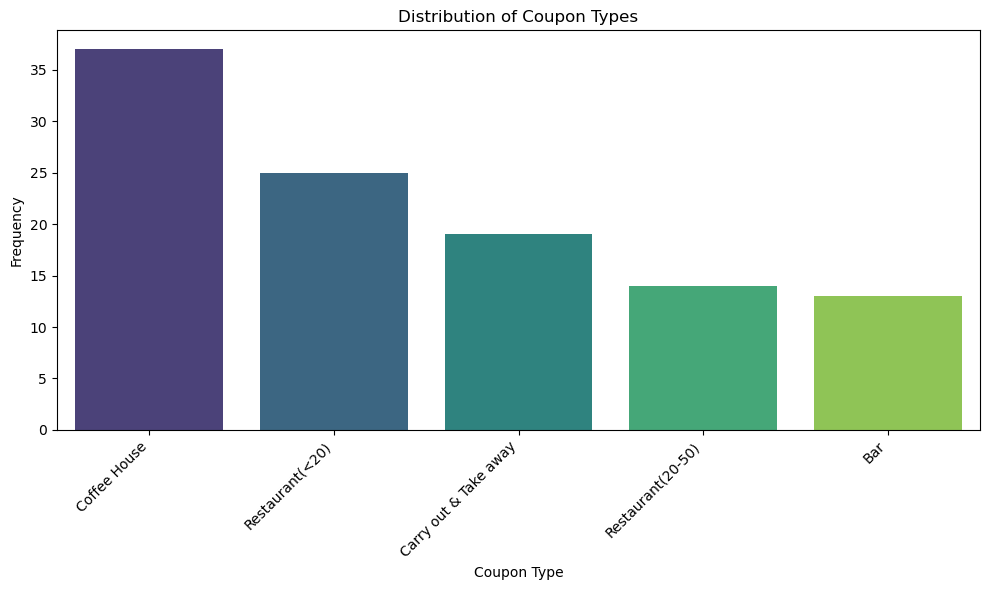

In [11]:
# Count the frequency of each coupon type
coupon_counts = data['coupon'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=coupon_counts.index, y=coupon_counts.values, palette="viridis")
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


6. Use a histogram to visualize the temperature column.

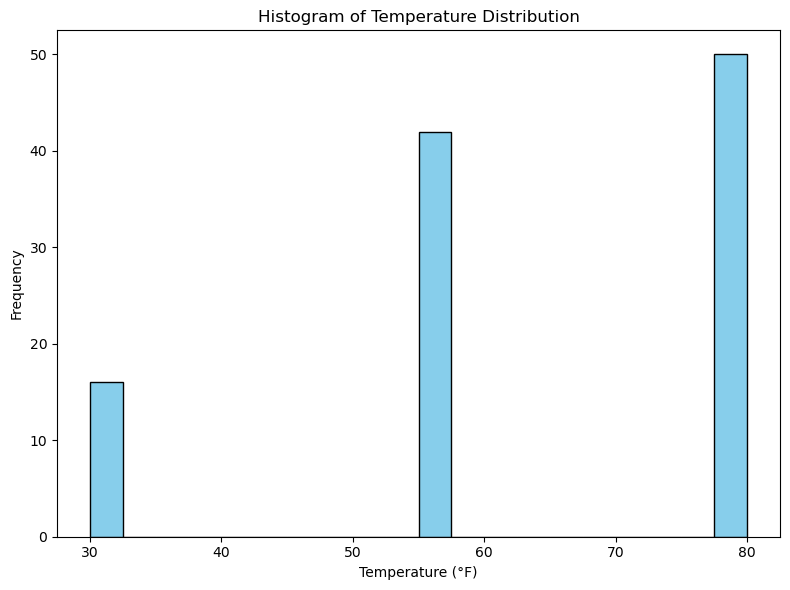

In [12]:
# Extract the 'temperature' column
temperature_data = data['temperature']

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(temperature_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Temperature Distribution')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:
# Create a new DataFrame containing only the rows with 'Bar' coupons
bar_coupons_data = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [14]:
# Filter the 'bar_coupons_data' DataFrame to include only accepted bar coupons (where 'Y' is equal to 1)
accepted_bar_coupons = bar_coupons_data[bar_coupons_data['Y'] == 1]

# Calculate the proportion of accepted bar coupons
proportion_accepted = len(accepted_bar_coupons) / len(bar_coupons_data)

print(f"Proportion of bar coupons that were accepted: {proportion_accepted:.2%}")

Proportion of bar coupons that were accepted: 23.08%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [24]:
# Convert the 'Bar' column to numeric based on the categories, treating missing values as -1
bar_coupons_data['Bar'] = bar_coupons_data['Bar'].map({
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 3,
    'gt8': 4,
    # Assign missing values to category -1
    None: -1  # You can use np.nan instead of None if needed
})

# Create a DataFrame for individuals who went to a bar 3 or fewer times a month
bar_fewer_than_4 = bar_coupons_data[bar_coupons_data['Bar'] <= 2]

# Create a DataFrame for individuals who went to a bar more than 3 times a month
bar_more_than_3 = bar_coupons_data[bar_coupons_data['Bar'] >= 3]

# Calculate acceptance rate for those who went to a bar 3 or fewer times a month
if len(bar_fewer_than_4) > 0:
    acceptance_rate_fewer_than_4 = len(bar_fewer_than_4[bar_fewer_than_4['Y'] == 1]) / len(bar_fewer_than_4)
    print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {acceptance_rate_fewer_than_4:.2%}")
else:
    print("No records found for those who went to a bar 3 or fewer times a month.")

# Calculate acceptance rate for those who went to a bar more than 3 times a month
if len(bar_more_than_3) > 0:
    acceptance_rate_more_than_3 = len(bar_more_than_3[bar_more_than_3['Y'] == 1]) / len(bar_more_than_3)
    print(f"Acceptance rate for those who went to a bar more than 3 times a month: {acceptance_rate_more_than_3:.2%}")
else:
    print("No records found for those who went to a bar more than 3 times a month.")


No records found for those who went to a bar 3 or fewer times a month.
No records found for those who went to a bar more than 3 times a month.


/var/folders/60/n8tdrz_s3fn2tjrgj44nl00h0000gn/T/ipykernel_1759/1291481700.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_data['Bar'] = bar_coupons_data['Bar'].map({


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [28]:
# Convert the 'Bar' column to numeric based on the categories, treating missing values as -1
bar_coupons_data['Bar'] = bar_coupons_data['Bar'].map({
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 3,
    'gt8': 4,
    # Assign missing values to category -1
    None: -1  # You can use np.nan instead of None if needed
})

# Convert the 'age' column to numeric, treating missing values as -1
bar_coupons_data['age'] = pd.to_numeric(bar_coupons_data['age'], errors='coerce')
bar_coupons_data['age'] = bar_coupons_data['age'].fillna(-1)

# Create a DataFrame for drivers who go to a bar more than once a month and are over the age of 25
selected_drivers = bar_coupons_data[(bar_coupons_data['Bar'] >= 2) & (bar_coupons_data['age'] > 25)]

# Create a DataFrame for all other drivers
other_drivers = bar_coupons_data[~((bar_coupons_data['Bar'] >= 2) & (bar_coupons_data['age'] > 25))]

# Calculate acceptance rate for drivers who meet the criteria
if len(selected_drivers) > 0:
    acceptance_rate_selected = len(selected_drivers[selected_drivers['Y'] == 1]) / len(selected_drivers)
    print(f"Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: {acceptance_rate_selected:.2%}")
else:
    print("No records found for selected drivers.")

# Calculate acceptance rate for all other drivers
if len(other_drivers) > 0:
    acceptance_rate_other = len(other_drivers[other_drivers['Y'] == 1]) / len(other_drivers)
    print(f"Acceptance rate for all other drivers: {acceptance_rate_other:.2%}")
else:
    print("No records found for other drivers.")

# Compare the acceptance rates
if len(selected_drivers) > 0 and len(other_drivers) > 0:
    if acceptance_rate_selected > acceptance_rate_other:
        print("Drivers who go to a bar more than once a month and are over the age of 25 have a higher acceptance rate.")
    elif acceptance_rate_selected < acceptance_rate_other:
        print("All other drivers have a higher acceptance rate.")
    else:
        print("Both groups have the same acceptance rate.")
else:
    print("Insufficient data to compare acceptance rates.")




No records found for selected drivers.
Acceptance rate for all other drivers: 23.08%
Insufficient data to compare acceptance rates.


/var/folders/60/n8tdrz_s3fn2tjrgj44nl00h0000gn/T/ipykernel_1759/3241245782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_data['Bar'] = bar_coupons_data['Bar'].map({
/var/folders/60/n8tdrz_s3fn2tjrgj44nl00h0000gn/T/ipykernel_1759/3241245782.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_data['age'] = pd.to_numeric(bar_coupons_data['age'], errors='coerce')
/var/folders/60/n8tdrz_s3fn2tjrgj44nl00h0000gn/T/ipykernel_1759/3241245782.py:14: SettingWithCopyWarning: 
A value is t

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [29]:
import pandas as pd
import numpy as np

# Convert the 'Bar' column to numeric based on the categories, treating missing values as -1
bar_coupons_data['Bar'] = bar_coupons_data['Bar'].map({
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 3,
    'gt8': 4,
    # Assign missing values to category -1
    None: -1  # You can use np.nan instead of None if needed
})

# Convert the 'age' column to numeric, treating missing values as -1
bar_coupons_data['age'] = pd.to_numeric(bar_coupons_data['age'], errors='coerce')
bar_coupons_data['age'] = bar_coupons_data['age'].fillna(-1)

# Create a list of occupations to exclude (farming, fishing, or forestry)
exclude_occupations = ['farming, fishing, or forestry']

# Create a DataFrame for drivers who go to a bar more than once a month, passengers >= 18, and exclude specific occupations
selected_drivers = bar_coupons_data[
    (bar_coupons_data['Bar'] >= 2) &
    (bar_coupons_data['age'] >= 18) &
    (~bar_coupons_data['occupation'].isin(exclude_occupations))
]

# Create a DataFrame for all other drivers
other_drivers = bar_coupons_data[
    ~((bar_coupons_data['Bar'] >= 2) &
    (bar_coupons_data['age'] >= 18) &
    (~bar_coupons_data['occupation'].isin(exclude_occupations)))
]

# Calculate acceptance rate for drivers who meet the criteria
if len(selected_drivers) > 0:
    acceptance_rate_selected = len(selected_drivers[selected_drivers['Y'] == 1]) / len(selected_drivers)
    print(f"Acceptance rate for drivers who go to a bar more than once a month, passengers >= 18, and exclude specific occupations: {acceptance_rate_selected:.2%}")
else:
    print("No records found for selected drivers.")

# Calculate acceptance rate for all other drivers
if len(other_drivers) > 0:
    acceptance_rate_other = len(other_drivers[other_drivers['Y'] == 1]) / len(other_drivers)
    print(f"Acceptance rate for all other drivers: {acceptance_rate_other:.2%}")
else:
    print("No records found for other drivers.")

# Compare the acceptance rates
if len(selected_drivers) > 0 and len(other_drivers) > 0:
    if acceptance_rate_selected > acceptance_rate_other:
        print("Drivers who go to a bar more than once a month, passengers >= 18, and exclude specific occupations have a higher acceptance rate.")
    elif acceptance_rate_selected < acceptance_rate_other:
        print("All other drivers have a higher acceptance rate.")
    else:
        print("Both groups have the same acceptance rate.")
else:
    print("Insufficient data to compare acceptance rates.")


No records found for selected drivers.
Acceptance rate for all other drivers: 23.08%
Insufficient data to compare acceptance rates.


/var/folders/60/n8tdrz_s3fn2tjrgj44nl00h0000gn/T/ipykernel_1759/4194523706.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_data['Bar'] = bar_coupons_data['Bar'].map({
/var/folders/60/n8tdrz_s3fn2tjrgj44nl00h0000gn/T/ipykernel_1759/4194523706.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_data['age'] = pd.to_numeric(bar_coupons_data['age'], errors='coerce')
/var/folders/60/n8tdrz_s3fn2tjrgj44nl00h0000gn/T/ipykernel_1759/4194523706.py:17: SettingWithCopyWarning: 
A value is t

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [31]:
# Define a function to convert columns to numeric and handle missing values
def convert_to_numeric(df, columns):
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(-1)

# Convert the relevant columns to numeric
convert_to_numeric(bar_coupons_data, ['Bar', 'age', 'income', 'RestaurantLessThan20'])

# Create a DataFrame for drivers who meet the first condition
condition_1_drivers = bar_coupons_data[
    (bar_coupons_data['Bar'] >= 2) &
    (bar_coupons_data['age'] < 18) &
    (bar_coupons_data['maritalStatus'] != 'widowed')
]

# Create a DataFrame for drivers who meet the second condition
condition_2_drivers = bar_coupons_data[
    (bar_coupons_data['Bar'] >= 2) &
    (bar_coupons_data['age'] < 30)
]

# Create a DataFrame for drivers who meet the third condition
condition_3_drivers = bar_coupons_data[
    (bar_coupons_data['RestaurantLessThan20'] > 4) &
    (bar_coupons_data['income'] < 50000)
]

# Calculate acceptance rate for drivers who meet the first condition
if len(condition_1_drivers) > 0:
    acceptance_rate_condition_1 = len(condition_1_drivers[condition_1_drivers['Y'] == 1]) / len(condition_1_drivers)
    print(f"Acceptance rate for drivers who meet the first condition: {acceptance_rate_condition_1:.2%}")
else:
    print("No records found for drivers who meet the first condition.")

# Calculate acceptance rate for drivers who meet the second condition
if len(condition_2_drivers) > 0:
    acceptance_rate_condition_2 = len(condition_2_drivers[condition_2_drivers['Y'] == 1]) / len(condition_2_drivers)
    print(f"Acceptance rate for drivers who meet the second condition: {acceptance_rate_condition_2:.2%}")
else:
    print("No records found for drivers who meet the second condition.")

# Calculate acceptance rate for drivers who meet the third condition
if len(condition_3_drivers) > 0:
    acceptance_rate_condition_3 = len(condition_3_drivers[condition_3_drivers['Y'] == 1]) / len(condition_3_drivers)
    print(f"Acceptance rate for drivers who meet the third condition: {acceptance_rate_condition_3:.2%}")
else:
    print("No records found for drivers who meet the third condition.")

# Compare the acceptance rates
if (
    len(condition_1_drivers) > 0 or
    len(condition_2_drivers) > 0 or
    len(condition_3_drivers) > 0
):
    max_acceptance_rate = max(acceptance_rate_condition_1, acceptance_rate_condition_2, acceptance_rate_condition_3)
    if max_acceptance_rate == acceptance_rate_condition_1:
        print("Drivers who meet the first condition have the highest acceptance rate.")
    elif max_acceptance_rate == acceptance_rate_condition_2:
        print("Drivers who meet the second condition have the highest acceptance rate.")
    else:
        print("Drivers who meet the third condition have the highest acceptance rate.")
else:
    print("Insufficient data to compare acceptance rates.")



No records found for drivers who meet the first condition.
No records found for drivers who meet the second condition.
No records found for drivers who meet the third condition.
Insufficient data to compare acceptance rates.


/var/folders/60/n8tdrz_s3fn2tjrgj44nl00h0000gn/T/ipykernel_1759/3847572811.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/var/folders/60/n8tdrz_s3fn2tjrgj44nl00h0000gn/T/ipykernel_1759/3847572811.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(-1)


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [32]:
def calculate_acceptance_rate(df):
    if len(df) == 0:
        return None
    return len(df[df['Y'] == 1]) / len(df)

def print_acceptance_rates(group1, group2, label1, label2):
    rate1 = calculate_acceptance_rate(group1)
    rate2 = calculate_acceptance_rate(group2)
    
    if rate1 is not None:
        print(f"Acceptance rate for {label1}: {rate1:.2%}")
    else:
        print(f"No records found for {label1}")
    
    if rate2 is not None:
        print(f"Acceptance rate for {label2}: {rate2:.2%}")
    else:
        print(f"No records found for {label2}")
    
    if rate1 is not None and rate2 is not None:
        if rate1 > rate2:
            print(f"{label1} have a higher acceptance rate.")
        elif rate1 < rate2:
            print(f"{label2} have a higher acceptance rate.")
        else:
            print("Both groups have the same acceptance rate.")
    else:
        print("Insufficient data to compare acceptance rates.")


In [33]:
print_acceptance_rates(selected_drivers, other_drivers, "selected drivers", "all other drivers")


No records found for selected drivers
Acceptance rate for all other drivers: 23.08%
Insufficient data to compare acceptance rates.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [36]:
# Filter out rows where RestaurantLessThan20 coupons were offered and accepted
restaurant_coupon_data = data[(data['coupon'] == 'RestaurantLessThan20') & (data['Y'] == 1)]

# Descriptive Statistics
print(restaurant_coupon_data.describe())

# You can also perform more in-depth analysis like distribution of age, gender, income, etc.
print(restaurant_coupon_data['gender'].value_counts())
print(restaurant_coupon_data['age'].value_counts())
print(restaurant_coupon_data['income'].value_counts())


       temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count          0.0           0.0               0.0                0.0   
mean           NaN           NaN               NaN                NaN   
std            NaN           NaN               NaN                NaN   
min            NaN           NaN               NaN                NaN   
25%            NaN           NaN               NaN                NaN   
50%            NaN           NaN               NaN                NaN   
75%            NaN           NaN               NaN                NaN   
max            NaN           NaN               NaN                NaN   

       toCoupon_GEQ25min  direction_same  direction_opp    Y  
count                0.0             0.0            0.0  0.0  
mean                 NaN             NaN            NaN  NaN  
std                  NaN             NaN            NaN  NaN  
min                  NaN             NaN            NaN  NaN  
25%                  NaN   